In [1]:
import pandas as pd


In [9]:
df = pd.read_csv(r'E:\Students.csv')
print(data.head())



  Student_Name                                      College_Name       Stream  \
0        Aarav       Indian Institute of Information Technology   Engineering   
1       Vivaan   Government Ram Bhajan Rai NES College, Jashpur      Commerce   
2       Aditya     Dolphin PG Institute of BioMedical & Natural       Science   
3       Vihaan  Shaheed Rajguru College of Applied Sciences for          Arts   
4        Arjun                   Roorkee College of Engineering       Science   

   Year_of_Study AI_Tools_Used  Daily_Usage_Hours  \
0              4        Gemini                0.9   
1              2       ChatGPT                3.4   
2              2       Copilot                3.6   
3              2       Copilot                2.9   
4              1        Gemini                0.9   

                       Use_Cases  Trust_in_AI_Tools  Impact_on_Grades  \
0       Assignments, Coding Help                  2                 2   
1            Learning new topics                

In [11]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Student_Name               3614 non-null   object 
 1   College_Name               3614 non-null   object 
 2   Stream                     3614 non-null   object 
 3   Year_of_Study              3614 non-null   int64  
 4   AI_Tools_Used              3614 non-null   object 
 5   Daily_Usage_Hours          3614 non-null   float64
 6   Use_Cases                  3614 non-null   object 
 7   Trust_in_AI_Tools          3614 non-null   int64  
 8   Impact_on_Grades           3614 non-null   int64  
 9   Do_Professors_Allow_Use    3614 non-null   object 
 10  Preferred_AI_Tool          3614 non-null   object 
 11  Awareness_Level            3614 non-null   int64  
 12  Willing_to_Pay_for_Access  3614 non-null   object 
 13  State                      2000 non-null   objec

In [12]:
print(data.isnull().sum())


Student_Name                    0
College_Name                    0
Stream                          0
Year_of_Study                   0
AI_Tools_Used                   0
Daily_Usage_Hours               0
Use_Cases                       0
Trust_in_AI_Tools               0
Impact_on_Grades                0
Do_Professors_Allow_Use         0
Preferred_AI_Tool               0
Awareness_Level                 0
Willing_to_Pay_for_Access       0
State                        1614
Device_Used                     0
Internet_Access                 0
dtype: int64


In [13]:
df.columns = df.columns.str.strip().str.replace(" ", "_")


In [14]:
df['State'] = df['State'].fillna('Unknown')


In [15]:
print(df['AI_Tools_Used'].value_counts())


AI_Tools_Used
ChatGPT                     626
Gemini                      612
Copilot                     585
ChatGPT, Copilot            505
ChatGPT, Gemini, Copilot    426
Gemini, Midjourney          371
Claude                      171
Other                       167
Bard                        151
Name: count, dtype: int64


In [16]:
#Average Daily Usage per AI Tool
avg_usage = df.groupby('AI_Tools_Used')['Daily_Usage_Hours'].mean().sort_values(ascending=False)
print(avg_usage)


AI_Tools_Used
Other                       2.732934
Bard                        2.721854
Gemini                      2.683333
Claude                      2.671345
ChatGPT                     2.620128
Gemini, Midjourney          2.592453
Copilot                     2.451966
ChatGPT, Gemini, Copilot    2.441549
ChatGPT, Copilot            2.391683
Name: Daily_Usage_Hours, dtype: float64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


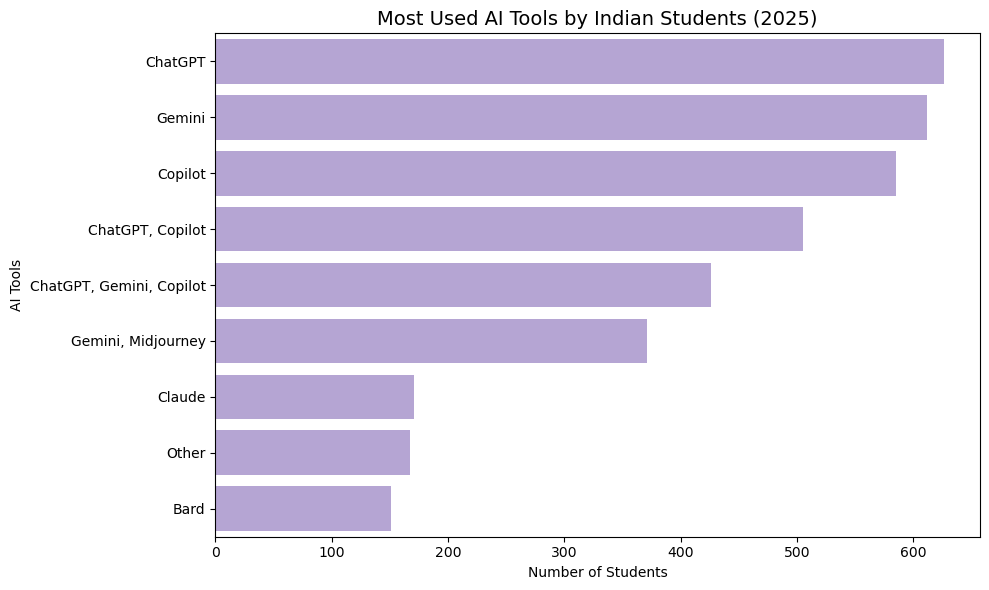

In [18]:
# AI Tool Usage Count
plt.figure(figsize=(10,6))
sns.countplot(y='AI_Tools_Used', data=df, order=df['AI_Tools_Used'].value_counts().index, color='#B39DDB')
plt.title("Most Used AI Tools by Indian Students (2025)", fontsize=14)
plt.xlabel("Number of Students")
plt.ylabel("AI Tools")
plt.tight_layout()
plt.show()


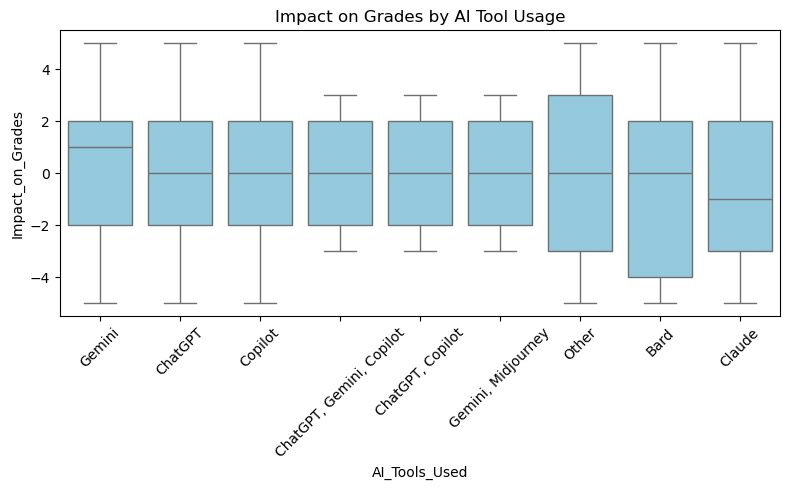

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='AI_Tools_Used', y='Impact_on_Grades', color='skyblue')
plt.title("Impact on Grades by AI Tool Usage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


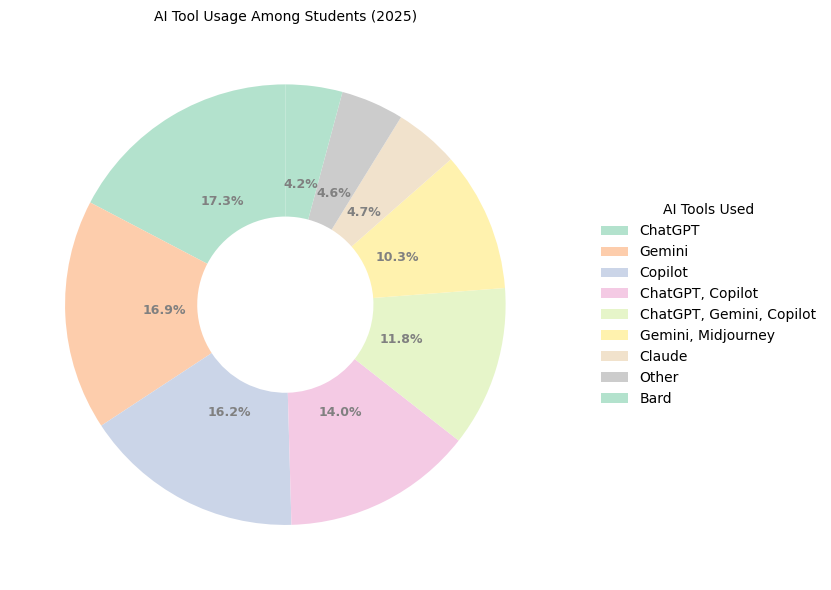

In [45]:
import matplotlib.pyplot as plt

# Counts and labels
counts = df['AI_Tools_Used'].value_counts()
labels_full = counts.index          # full names for legend
sizes       = counts.values
colors      = plt.cm.Pastel2.colors # or any palette you prefer

fig, ax = plt.subplots(figsize=(8, 6))

# --- draw donut ---
wedges, _ = ax.pie(
    sizes,
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.6),
    labels=None          # we’ll add % inside instead
)

# --- put ONLY % or count inside each slice ---
for w, s in zip(wedges, sizes):
    angle = (w.theta2 + w.theta1) / 2
    x, y  = 0.55 * np.cos(np.deg2rad(angle)), 0.55 * np.sin(np.deg2rad(angle))
    ax.text(x, y, f'{s/sum(sizes)*100:.1f}%', ha='center', va='center',
            fontsize=9, weight='bold', color='grey')

# --- add legend with full labels outside ---
ax.legend(wedges, labels_full,
          title="AI Tools Used",
          loc="center left",
          bbox_to_anchor=(1.05, 0.5),
          frameon=False)

ax.set_title("AI Tool Usage Among Students (2025)", fontsize=10)
plt.tight_layout()
plt.show()


In [48]:
import sqlite3
import pandas as pd


In [49]:
conn = sqlite3.connect("AI_tools_usage.db")  # creates the file if it doesn't exist
cursor = conn.cursor()


In [50]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS student_ai_usage (
    Student_Name TEXT,
    College_Name TEXT,
    Stream TEXT,
    Year_of_Study INTEGER,
    AI_Tools_Used TEXT,
    Daily_Usage_Hours REAL,
    Use_Cases TEXT,
    Trust_in_AI_Tools INTEGER,
    Impact_on_Grades INTEGER,
    Do_Professors_Allow_Use TEXT,
    Preferred_AI_Tool TEXT,
    Awareness_Level INTEGER,
    Willing_to_Pay_for_Access TEXT,
    State TEXT,
    Device_Used TEXT,
    Internet_Access TEXT
)
""")
conn.commit()


In [52]:
# Save to a new CSV file for SQL use
df.to_csv("AI_tool_usage_cleaned.csv", index=False)


In [53]:
import pandas as pd
import sqlite3

# Load the cleaned CSV file
df = pd.read_csv("AI_tool_usage_cleaned.csv")

# Save to a new SQLite database with a unique name
conn = sqlite3.connect("ai_tool_usage_fresh.db")  # <-- New database file

# Save the data to a new table
df.to_sql("student_ai_usage", conn, if_exists="replace", index=False)


3614

In [60]:
#Top 10 Most Used AI Tools
query1 = """
SELECT Preferred_AI_Tool, COUNT(*) AS Usage_Count
FROM student_ai_usage
GROUP BY Preferred_AI_Tool
ORDER BY Usage_Count DESC
LIMIT 10;
"""

# Step 5: Execute the query and load results into DataFrame
df_top_tools = pd.read_sql_query(query1, conn)
print(df_top_tools)



  Preferred_AI_Tool  Usage_Count
0           ChatGPT          859
1            Gemini          854
2           Copilot          836
3             Other          757
4            Claude          157
5              Bard          151


In [59]:
#Average Trust Score per AI Tool (Ranked)
query2 = """
SELECT Preferred_AI_Tool, 
       ROUND(AVG(Trust_in_AI_Tools), 2) AS Avg_Trust_Score,
       COUNT(*) AS User_Count
FROM student_ai_usage
GROUP BY Preferred_AI_Tool
ORDER BY Avg_Trust_Score DESC;
"""

df_trust_score = pd.read_sql_query(query2, conn)
print(df_trust_score)

# Step 3: Save to CSV
df_trust_score.to_csv("ai_tool_trust_scores.csv", index=False)

  Preferred_AI_Tool  Avg_Trust_Score  User_Count
0           Copilot             3.12         836
1            Gemini             3.06         854
2             Other             2.99         757
3           ChatGPT             2.96         859
4              Bard             2.94         151
5            Claude             2.91         157


In [65]:
#Permission by Professors vs AI Tool Usage
import sqlite3
import pandas as pd

# ✅ Step 1: Reconnect to SQLite
conn = sqlite3.connect("ai_tool_usage.db")  # Make sure the DB path is correct

# ✅ Step 2: SQL Query for Professor Permission
query1 = """
SELECT Do_Professors_Allow_Use, COUNT(*) AS User_Count
FROM student_ai_usage
GROUP BY Do_Professors_Allow_Use
ORDER BY User_Count DESC;
"""

# ✅ Step 3: Run query
df_permission = pd.read_sql_query(query1, conn)

# ✅ Step 4: Show result
print(df_permission)

# ✅ Step 5 (Optional): Export to CSV
df_permission.to_csv("professors_allow_analysis.csv", index=False)

  Do_Professors_Allow_Use  User_Count
0                      No        1886
1                     Yes        1728


In [66]:
# Awareness Level vs Trust in AI Tools
query3 = """
SELECT Awareness_Level, Trust_in_AI_Tools, COUNT(*) AS User_Count
FROM student_ai_usage
GROUP BY Awareness_Level, Trust_in_AI_Tools
ORDER BY Awareness_Level, Trust_in_AI_Tools;
"""

# Step 3: Run query
df_awareness_trust = pd.read_sql_query(query3, conn)

# Step 4: Show result
print(df_awareness_trust)

# Step 5 (Optional): Export for Tableau
df_awareness_trust.to_csv("awareness_vs_trust.csv", index=False) 


    Awareness_Level  Trust_in_AI_Tools  User_Count
0                 1                  1          57
1                 1                  2          46
2                 1                  3          91
3                 1                  4          54
4                 1                  5          64
5                 2                  1          77
6                 2                  2          83
7                 2                  3          68
8                 2                  4          46
9                 2                  5          73
10                3                  1          94
11                3                  2          64
12                3                  3          83
13                3                  4          61
14                3                  5          60
15                4                  1          54
16                4                  2          49
17                4                  3          54
18                4            

In [67]:
#Most Preferred AI Tool by Stream
# Step 1: SQL Query - Stream vs Preferred AI Tool
query4 = """
SELECT Stream, Preferred_AI_Tool, COUNT(*) AS User_Count
FROM student_ai_usage
GROUP BY Stream, Preferred_AI_Tool
ORDER BY Stream, User_Count DESC;
"""

# Step 2: Run query
df_stream_tool = pd.read_sql_query(query4, conn)

# Step 3: View result
print(df_stream_tool)

# Step 4 (Optional): Export to CSV for Tableau
df_stream_tool.to_csv("stream_vs_preferred_tool.csv", index=False)


              Stream Preferred_AI_Tool  User_Count
0        Agriculture           ChatGPT          61
1        Agriculture           Copilot          60
2        Agriculture            Gemini          58
3        Agriculture             Other          53
4        Agriculture              Bard          16
5        Agriculture            Claude          14
6               Arts            Gemini         127
7               Arts           Copilot         100
8               Arts           ChatGPT          81
9               Arts             Other          67
10              Arts            Claude          20
11              Arts              Bard          18
12          Commerce           ChatGPT          96
13          Commerce           Copilot          85
14          Commerce             Other          78
15          Commerce            Gemini          60
16          Commerce            Claude          27
17          Commerce              Bard          18
18       Engineering           

In [68]:
#Daily AI Usage by Device Type
# Step 1: SQL Query - Daily Usage Hours by Device Used
query5 = """
SELECT Device_Used, ROUND(AVG(Daily_Usage_Hours), 2) AS Avg_Usage_Hours, COUNT(*) AS User_Count
FROM student_ai_usage
GROUP BY Device_Used
ORDER BY Avg_Usage_Hours DESC;
"""

# Step 2: Run query
df_device_usage = pd.read_sql_query(query5, conn)

# Step 3: View result
print(df_device_usage)

# Step 4 (Optional): Export to CSV for Tableau
df_device_usage.to_csv("device_vs_avg_usage.csv", index=False)


  Device_Used  Avg_Usage_Hours  User_Count
0      Laptop             2.60        1336
1      Mobile             2.56        1086
2      Tablet             2.51        1192


In [69]:
#Trust in AI Tools vs Willingness to Pay
# Step 1: SQL Query - Trust vs Willingness to Pay
query6 = """
SELECT Trust_in_AI_Tools, Willing_to_Pay_for_Access, COUNT(*) AS User_Count
FROM student_ai_usage
GROUP BY Trust_in_AI_Tools, Willing_to_Pay_for_Access
ORDER BY Trust_in_AI_Tools;
"""

# Step 2: Run query
df_trust_pay = pd.read_sql_query(query6, conn)

# Step 3: View result
print(df_trust_pay)

# Step 4 (Optional): Export for Tableau
df_trust_pay.to_csv("trust_vs_pay.csv", index=False)


   Trust_in_AI_Tools Willing_to_Pay_for_Access  User_Count
0                  1                        No         371
1                  1                       Yes         343
2                  2                        No         370
3                  2                       Yes         380
4                  3                        No         344
5                  3                       Yes         341
6                  4                        No         308
7                  4                       Yes         360
8                  5                        No         418
9                  5                       Yes         379


In [70]:
#AI Tool Usage Impact on Grades
# Step 1: SQL Query - Impact on Grades
query7 = """
SELECT Impact_on_Grades, COUNT(*) AS User_Count
FROM student_ai_usage
GROUP BY Impact_on_Grades
ORDER BY User_Count DESC;
"""

# Step 2: Run query
df_grade_impact = pd.read_sql_query(query7, conn)

# Step 3: View result
print(df_grade_impact)

# Step 4 (Optional): Export for Tableau
df_grade_impact.to_csv("ai_impact_on_grades.csv", index=False)


    Impact_on_Grades  User_Count
0                  2         523
1                  1         477
2                  0         465
3                 -3         463
4                 -1         446
5                 -2         445
6                  3         419
7                 -4         110
8                  4          93
9                  5          89
10                -5          84


In [71]:
#Awareness Level by Stream
# Step 1: SQL Query - Awareness Level by Stream
query8 = """
SELECT Stream, Awareness_Level, COUNT(*) AS User_Count
FROM student_ai_usage
GROUP BY Stream, Awareness_Level
ORDER BY Stream, Awareness_Level;
"""

# Step 2: Run query
df_awareness_stream = pd.read_sql_query(query8, conn)

# Step 3: View result
print(df_awareness_stream)

# Step 4 (Optional): Export for Tableau
df_awareness_stream.to_csv("awareness_by_stream.csv", index=False)


         Stream  Awareness_Level  User_Count
0   Agriculture                1          21
1   Agriculture                2          24
2   Agriculture                3          22
3   Agriculture                4          19
4   Agriculture                5          24
..          ...              ...         ...
95      Science                6          39
96      Science                7          59
97      Science                8          84
98      Science                9          36
99      Science               10          71

[100 rows x 3 columns]


In [72]:
# Close the SQLite connection
conn.close()
print("Connection closed.")


Connection closed.
